Found 1311 images in the dataset directory.
Epoch 1/10
27/27 [==============================] - 29s 1s/step - loss: 1.1888 - accuracy: 0.4964 - val_loss: 0.9942 - val_accuracy: 0.6476
Epoch 2/10
27/27 [==============================] - 26s 974ms/step - loss: 0.7611 - accuracy: 0.7029 - val_loss: 0.7002 - val_accuracy: 0.7143
Epoch 3/10
27/27 [==============================] - 25s 935ms/step - loss: 0.5128 - accuracy: 0.7828 - val_loss: 0.5680 - val_accuracy: 0.7810
Epoch 4/10
27/27 [==============================] - 26s 946ms/step - loss: 0.3690 - accuracy: 0.8473 - val_loss: 0.8499 - val_accuracy: 0.6857
Epoch 5/10
27/27 [==============================] - 27s 974ms/step - loss: 0.3656 - accuracy: 0.8592 - val_loss: 0.4959 - val_accuracy: 0.8143
Epoch 6/10
27/27 [==============================] - 26s 953ms/step - loss: 0.2386 - accuracy: 0.9057 - val_loss: 0.7598 - val_accuracy: 0.7048
Epoch 7/10
27/27 [==============================] - 26s 983ms/step - loss: 0.2280 - accuracy: 0.9141 

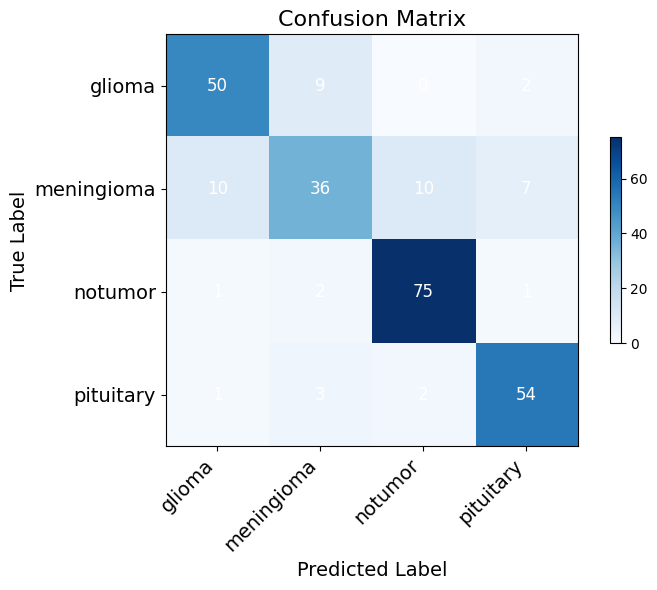

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


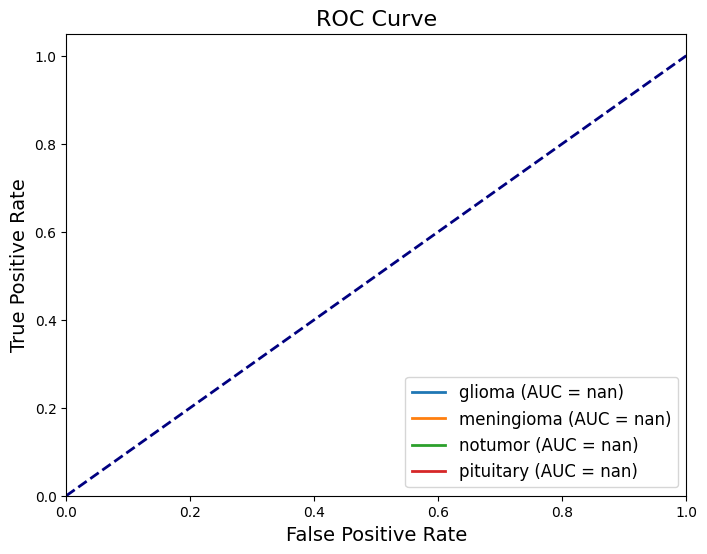

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class f

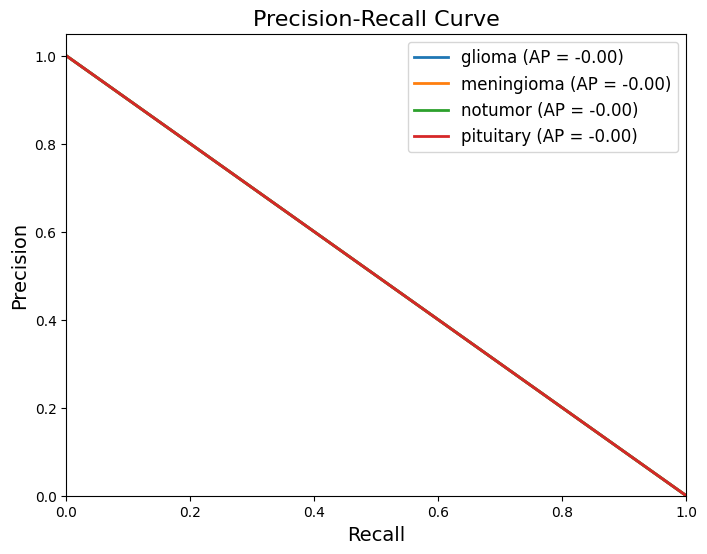

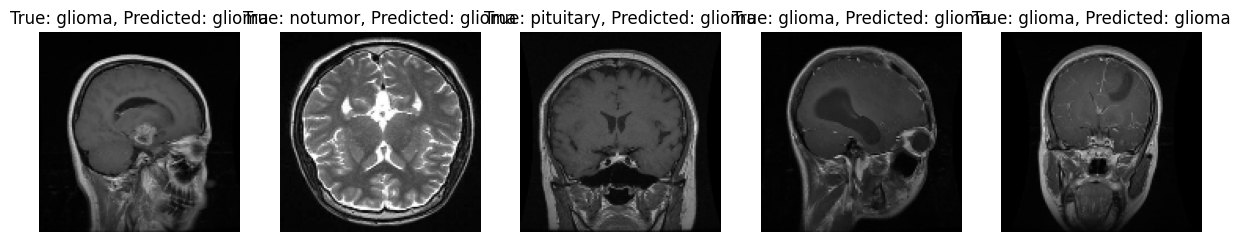

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve, average_precision_score
import os
import cv2

# Define the path to your dataset
dataset_path = "/content/drive/MyDrive/Testing"  # Replace with your actual path

# Define create_cnn_model function
def create_cnn_model(input_shape):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(4, activation='softmax')  # Adjust to 4 output classes
    ])
    return model

# Define function to load and preprocess dataset
def load_and_check_dataset(dataset_path):
    image_paths = []
    labels = []
    for subdir, dirs, files in os.walk(dataset_path):
        for filename in files:
            if filename.endswith(".jpg") or filename.endswith(".png") or filename.endswith(".bmp") or filename.endswith(".gif"):
                image_paths.append(os.path.join(subdir, filename))
                # Extract label from folder name
                label = subdir.split("/")[-1]  # Assuming labels are encoded in the last folder name
                labels.append(label)

    if not image_paths:
        raise ValueError("No image files found in the dataset directory.")

    # Load images using OpenCV and preprocess
    images = [preprocess_image(cv2.imread(image_path)) for image_path in image_paths]

    return images, labels

# Define function to preprocess image
def preprocess_image(image):
    resized_img = cv2.resize(image, (128, 128))
    processed_img = resized_img.astype('float32') / 255.0
    return processed_img

# Define function to plot confusion matrix
def plot_confusion_matrix(y_test, y_pred, class_names):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion Matrix", fontsize=16)
    plt.colorbar(shrink=0.5)
    plt.xticks(np.arange(len(class_names)), class_names, rotation=45, ha="right", fontsize=14)
    plt.yticks(np.arange(len(class_names)), class_names, fontsize=14)
    plt.xlabel("Predicted Label", fontsize=14)
    plt.ylabel("True Label", fontsize=14)
    for i in range(len(cm)):
        for j in range(len(cm[0])):
            plt.text(j, i, cm[i, j], ha="center", va="center", fontsize=12, color="white")
    plt.tight_layout()
    plt.show()

# Define function to plot ROC curve
def plot_roc_curve(y_test, y_pred_prob, class_names):
    plt.figure(figsize=(8, 6))
    for i in range(len(class_names)):
        fpr, tpr, _ = roc_curve(y_test == class_names[i], y_pred_prob[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f'{class_names[i]} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=14)
    plt.ylabel('True Positive Rate', fontsize=14)
    plt.title('ROC Curve', fontsize=16)
    plt.legend(loc="lower right", fontsize=12)
    plt.show()

# Define function to plot Precision-Recall curve
def plot_precision_recall_curve(y_test, y_pred_prob, class_names):
    plt.figure(figsize=(8, 6))
    for i in range(len(class_names)):
        precision, recall, _ = precision_recall_curve(y_test == class_names[i], y_pred_prob[:, i])
        average_precision = average_precision_score(y_test == class_names[i], y_pred_prob[:, i])
        plt.plot(recall, precision, lw=2, label=f'{class_names[i]} (AP = {average_precision:.2f})')
    plt.xlabel('Recall', fontsize=14)
    plt.ylabel('Precision', fontsize=14)
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall Curve', fontsize=16)
    plt.legend(loc="upper right", fontsize=12)
    plt.show()

# Define main function
# Define function to display images with predicted diseases
def display_images_with_predictions(images, true_labels, predicted_labels, class_names):
    num_images_to_display = 5  # Number of images to display
    indices_to_display = np.random.choice(len(images), num_images_to_display, replace=False)

    plt.figure(figsize=(15, 8))
    for i, idx in enumerate(indices_to_display, 1):
        plt.subplot(1, num_images_to_display, i)
        plt.imshow(images[idx])
        true_label = class_names[true_labels[idx]]
        pred_label = class_names[np.argmax(predicted_labels[idx])]
        plt.title(f'True: {true_label}, Predicted: {pred_label}')
        plt.axis('off')

    plt.show()


# Update main function to include image display
def main():
    # Load data
    try:
        images, labels = load_and_check_dataset(dataset_path)
    except ValueError as e:
        print(e)
        return

    print(f"Found {len(images)} images in the dataset directory.")

    # Preprocess images
    processed_images = np.array(images)

    # Encode labels
    unique_labels = np.unique(labels)
    label_to_index = {label: i for i, label in enumerate(unique_labels)}
    y = np.array([label_to_index[label] for label in labels])

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(processed_images, y, test_size=0.2, random_state=42)

    # Create CNN model
    input_shape = X_train[0].shape
    model = create_cnn_model(input_shape)

    # Compile the model
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

    # Evaluate the model
    loss, accuracy = model.evaluate(X_test, y_test)
    print(f'Test Loss: {loss:.4f}')
    print(f'Test Accuracy: {accuracy:.4f}')

    # Predict on test data
    y_pred_prob = model.predict(X_test)
    y_pred = np.argmax(y_pred_prob, axis=1)

    # Define class names for visualization
    class_names = unique_labels

    # Plot confusion matrix
    plot_confusion_matrix(y_test, y_pred, class_names)

    # Plot ROC curve
    plot_roc_curve(y_test, y_pred_prob, class_names)

    # Plot Precision-Recall curve
    plot_precision_recall_curve(y_test, y_pred_prob, class_names)

    # Display some images with predicted diseases
    display_images_with_predictions(X_test, y_test, y_pred, class_names)

if __name__ == "__main__":
    main()
